In [1]:
%matplotlib inline

In [128]:
import pandas as pd
import numpy as np
from itertools import islice
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [ ]:
statsmodel

In [ ]:
bokeh

## Visualization Matters!
![Dinosaur!](https://d2f99xq7vri1nk.cloudfront.net/DinoSequentialSmaller.gif)

In [166]:
df.describe()

,318113 Lane 1 Flow,318113 Lane 2 Flow,318113 Lane 3 Flow,318113 Lane 1 Occupancy (%),318113 Lane 2 Occupancy (%),318113 Lane 3 Occupancy (%)
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,82.822013,79.582053,47.573128,5.788828,5.859190,4.845950
std,52.706026,41.605089,25.522685,5.590521,4.949484,4.128307
min,0.000000,4.000000,1.000000,0.000000,0.176000,0.044000
25%,26.000000,37.000000,22.000000,1.389000,2.167000,2.311000
50%,95.000000,93.000000,52.000000,5.478000,5.878000,4.366000
75%,126.000000,113.000000,67.000000,7.821000,7.489000,6.000000
max,200.000000,161.000000,118.000000,43.911000,41.412000,46.132000


### Rectangular? Yes

In [3]:
!head pems.csv

Sample Time	318113 Lane 1 Flow	318113 Lane 2 Flow	318113 Lane 3 Flow	318113 Lane 1 Occupancy (%)	318113 Lane 2 Occupancy (%)	318113 Lane 3 Occupancy (%)
11/13/2016 00:00	37	42	23	2.06111111111111111111111111111111111111	2.59444444444444444444444444444444444444	1.79
11/13/2016 00:05	42	50	20	2.234	2.866	1.356
11/13/2016 00:10	35	57	27	1.877	3.133	1.678
11/13/2016 00:15	34	45	27	1.755	2.555	1.766
11/13/2016 00:20	29	37	26	1.534	2.244	1.523
11/13/2016 00:25	38	48	22	2.077	2.712	1.156
11/13/2016 00:30	21	39	18	1.066	2.157	1.012
11/13/2016 00:35	28	35	16	1.478	1.911	.857
11/13/2016 00:40	18	31	22	.945	1.634	1.489


### Record delimiter – new line
### Variable delimiter – tab
### Primitive types – date, numerics

In [4]:
with open("pems.csv") as f:
    for i in islice(f, 10):
        print(i.encode("utf8"))

b'Sample Time\t318113 Lane 1 Flow\t318113 Lane 2 Flow\t318113 Lane 3 Flow\t318113 Lane 1 Occupancy (%)\t318113 Lane 2 Occupancy (%)\t318113 Lane 3 Occupancy (%)\n'
b'11/13/2016 00:00\t37\t42\t23\t2.06111111111111111111111111111111111111\t2.59444444444444444444444444444444444444\t1.79\n'
b'11/13/2016 00:05\t42\t50\t20\t2.234\t2.866\t1.356\n'
b'11/13/2016 00:10\t35\t57\t27\t1.877\t3.133\t1.678\n'
b'11/13/2016 00:15\t34\t45\t27\t1.755\t2.555\t1.766\n'
b'11/13/2016 00:20\t29\t37\t26\t1.534\t2.244\t1.523\n'
b'11/13/2016 00:25\t38\t48\t22\t2.077\t2.712\t1.156\n'
b'11/13/2016 00:30\t21\t39\t18\t1.066\t2.157\t1.012\n'
b'11/13/2016 00:35\t28\t35\t16\t1.478\t1.911\t.857\n'
b'11/13/2016 00:40\t18\t31\t22\t.945\t1.634\t1.489\n'


In [165]:
df.columns

Index(['318113 Lane 1 Flow', '318113 Lane 2 Flow', '318113 Lane 3 Flow',
       '318113 Lane 1 Occupancy (%)', '318113 Lane 2 Occupancy (%)',
       '318113 Lane 3 Occupancy (%)'],
      dtype='object')

In [36]:
df = pd.read_csv("pems.csv", sep="\t", parse_dates=["Sample Time"], index_col=["Sample Time"])

### Granularity: 5 minutes sample from detectors

In [37]:
df.head()

,318113 Lane 1 Flow,318113 Lane 2 Flow,318113 Lane 3 Flow,318113 Lane 1 Occupancy (%),318113 Lane 2 Occupancy (%),318113 Lane 3 Occupancy (%)
Sample Time,,,,,,
2016-11-13 00:00:00,37,42,23,2.061111,2.594444,1.790
2016-11-13 00:05:00,42,50,20,2.234000,2.866000,1.356
2016-11-13 00:10:00,35,57,27,1.877000,3.133000,1.678
2016-11-13 00:15:00,34,45,27,1.755000,2.555000,1.766
2016-11-13 00:20:00,29,37,26,1.534000,2.244000,1.523


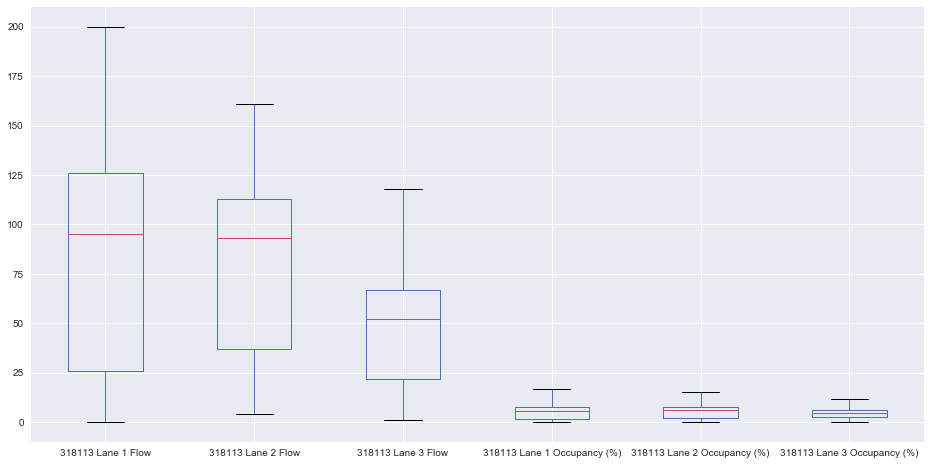

In [141]:
df.plot.box(figsize=(16,8))

### Kernel estimation plots with rug plot

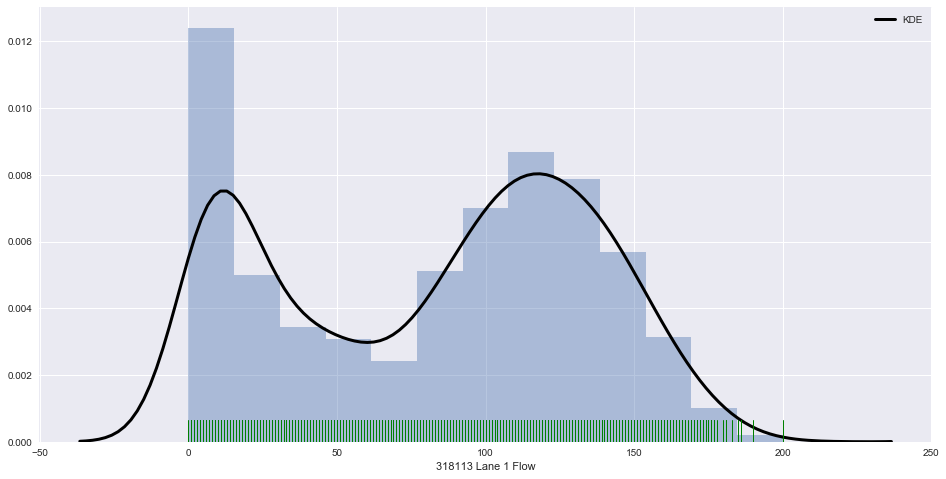

In [39]:
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(df['318113 Lane 1 Flow'], rug=True, hist=True, rug_kws={"color": "g"},
    kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.show()

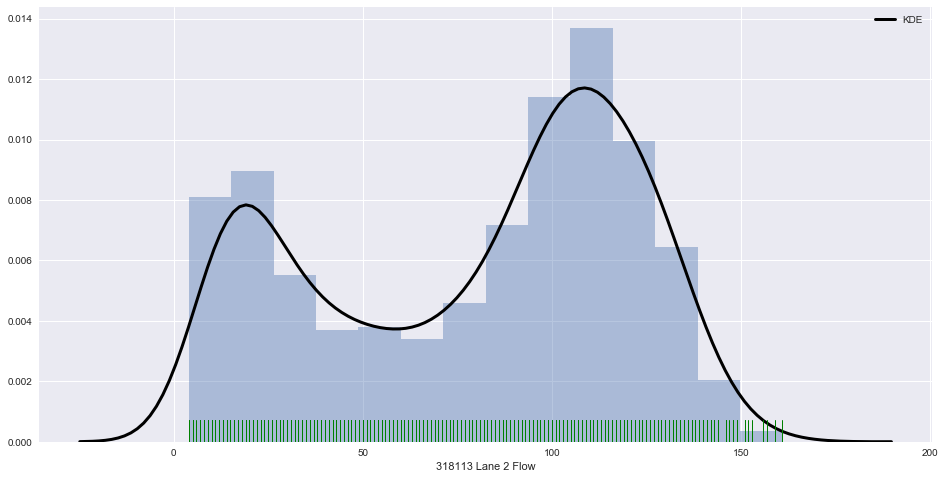

In [40]:
plt.subplots(figsize=(16,8))
sns.distplot(df['318113 Lane 2 Flow'], rug=True, hist=True, rug_kws={"color": "g"},
    kde_kws={"color": "k", "lw": 3, "label": "KDE"})

### Change to another kernel?

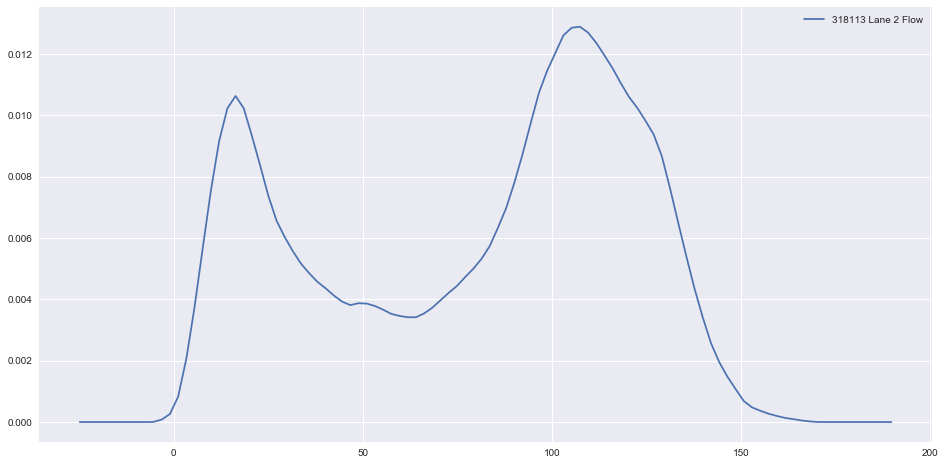

In [41]:
plt.subplots(figsize=(16,8))
sns.kdeplot(df['318113 Lane 2 Flow'], legend="KDE", kernel="epa")

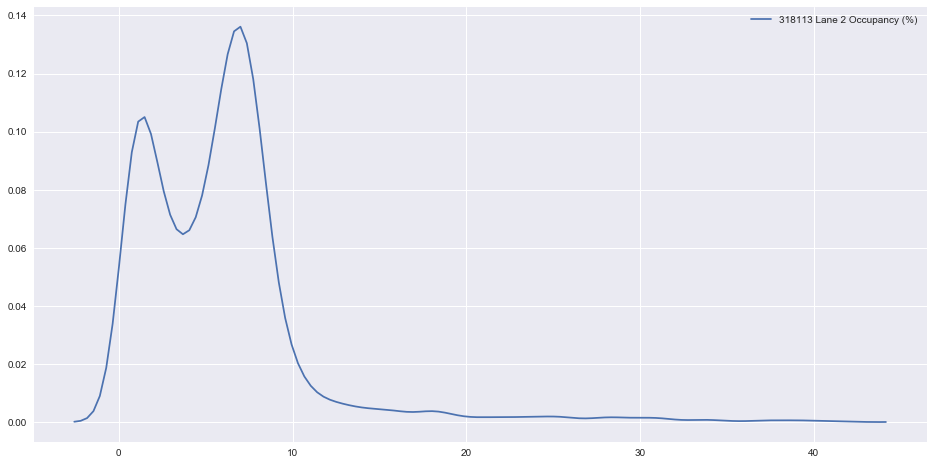

In [42]:
plt.subplots(figsize=(16,8))
sns.kdeplot(df['318113 Lane 2 Occupancy (%)'], legend="KDE", kernel="gau")

### Do the 3 lanes serve the same amount of traffic?

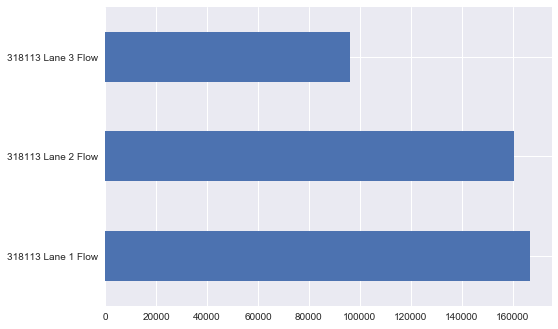

In [44]:
df[df.columns[:3]].sum().plot.barh()

### Same pattern on fluctuation

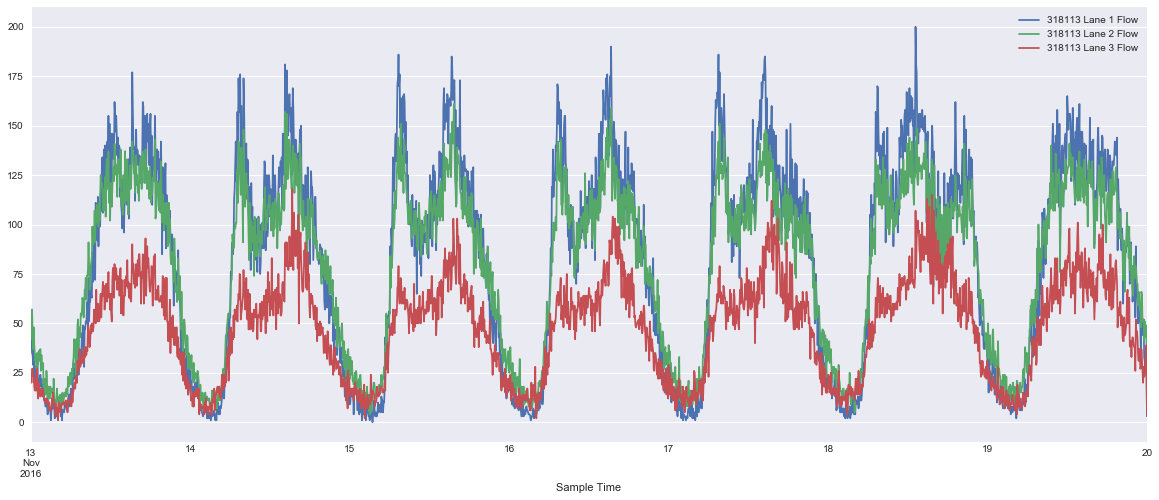

In [83]:
df[["318113 Lane 1 Flow", "318113 Lane 2 Flow", "318113 Lane 3 Flow"]].plot(figsize=(20,8))

### High Corr

In [84]:
df[["318113 Lane 1 Flow", "318113 Lane 2 Flow", "318113 Lane 3 Flow", ]].corr()

,318113 Lane 1 Flow,318113 Lane 2 Flow,318113 Lane 3 Flow
318113 Lane 1 Flow,1.000000,0.976939,0.925586
318113 Lane 2 Flow,0.976939,1.000000,0.933988
318113 Lane 3 Flow,0.925586,0.933988,1.000000


### Correlation between two lane flow

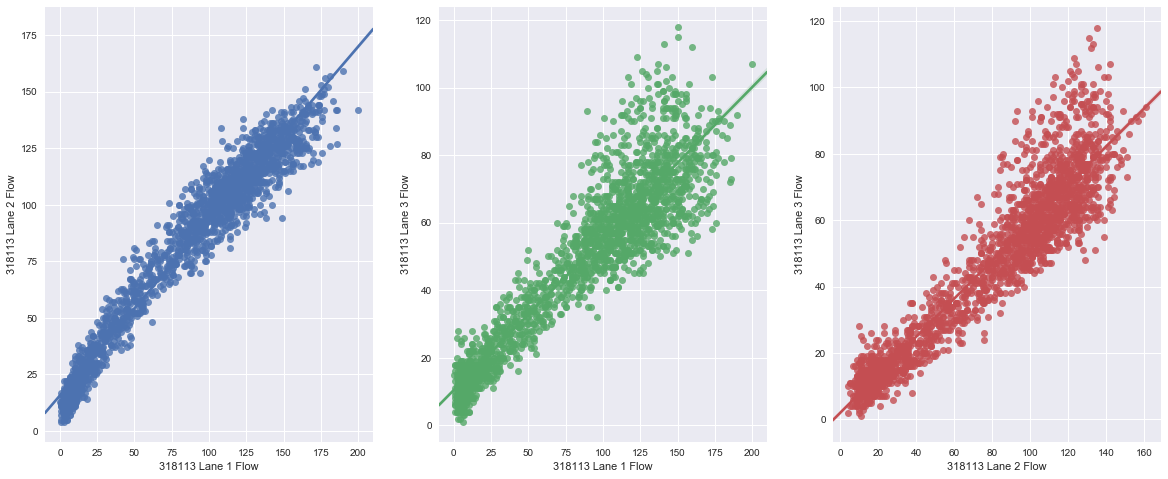

In [80]:
_, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,8))
sns.regplot(x="318113 Lane 1 Flow", y="318113 Lane 2 Flow", data=df, label="1-2", ax=ax1)
sns.regplot(x="318113 Lane 1 Flow", y="318113 Lane 3 Flow", data=df, label="1-3", ax=ax2)
sns.regplot(x="318113 Lane 2 Flow", y="318113 Lane 3 Flow", data=df, label="2-3", ax=ax3)

### Correlation between two lane occupancy

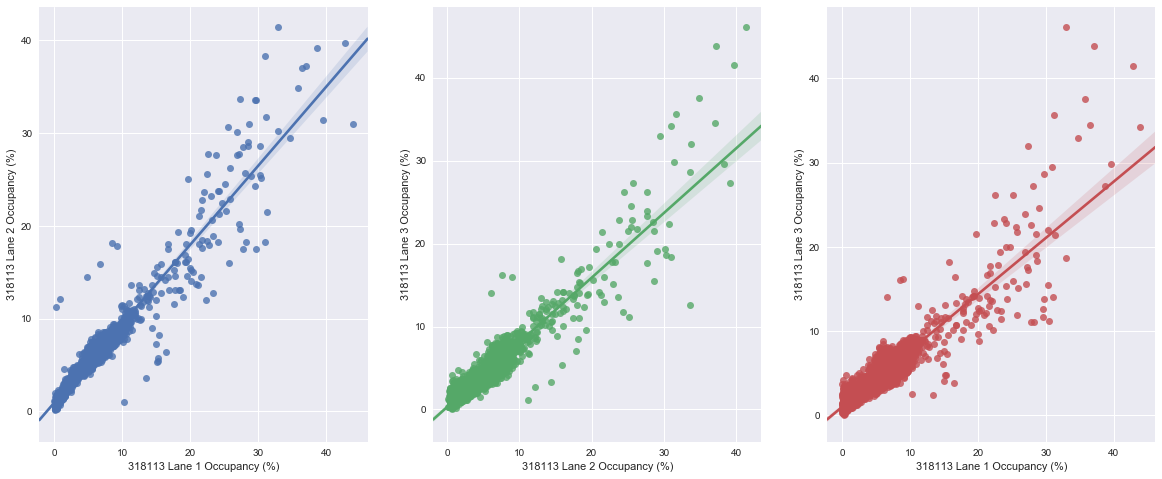

In [86]:
_, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,8))
sns.regplot(x="318113 Lane 1 Occupancy (%)", y="318113 Lane 2 Occupancy (%)", data=df, label="1-2", ax=ax1)
sns.regplot(x="318113 Lane 2 Occupancy (%)", y="318113 Lane 3 Occupancy (%)", data=df, label="1-3", ax=ax2)
sns.regplot(x="318113 Lane 1 Occupancy (%)", y="318113 Lane 3 Occupancy (%)", data=df, label="2-3", ax=ax3)

### Relationship between traffic and congestion

#### Traffic Break Down!

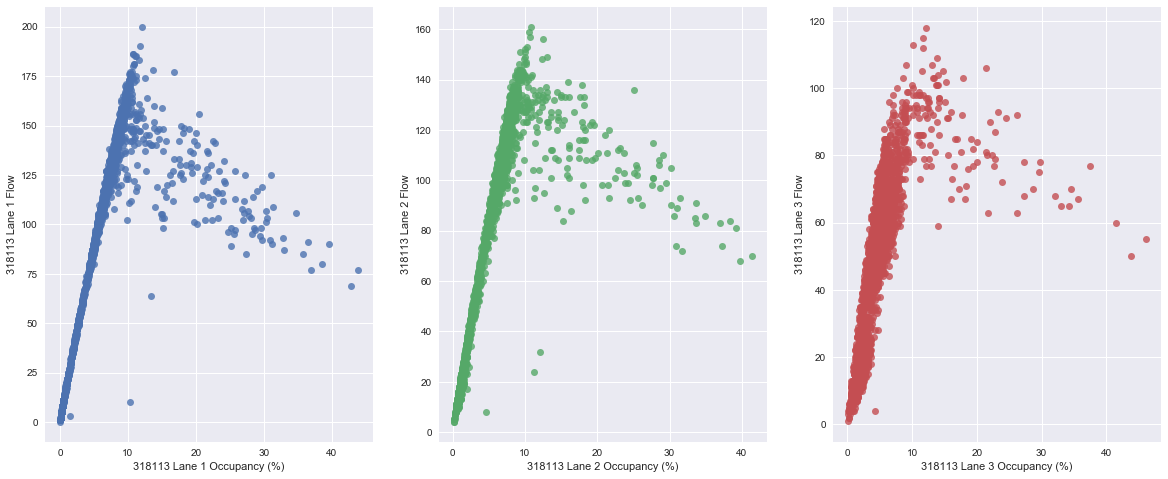

In [107]:
_, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,8))
sns.regplot(y="318113 Lane 1 Flow", x="318113 Lane 1 Occupancy (%)", data=df, label="1-2", ax=ax1, fit_reg=False)
sns.regplot(y="318113 Lane 2 Flow", x="318113 Lane 2 Occupancy (%)", data=df, label="1-3", ax=ax2, fit_reg=False)
sns.regplot(y="318113 Lane 3 Flow", x="318113 Lane 3 Occupancy (%)", data=df, label="2-3", ax=ax3, fit_reg=False)

### Correlations. Are they linear! 
No. But after excluding traffic break downs, Yes!

In [88]:
df[["318113 Lane 1 Flow", "318113 Lane 1 Occupancy (%)"]].corr()

,318113 Lane 1 Flow,318113 Lane 1 Occupancy (%)
318113 Lane 1 Flow,1.000000,0.663882
318113 Lane 1 Occupancy (%),0.663882,1.000000


In [89]:
df[["318113 Lane 2 Flow", "318113 Lane 2 Occupancy (%)"]].corr()

,318113 Lane 2 Flow,318113 Lane 2 Occupancy (%)
318113 Lane 2 Flow,1.000000,0.643602
318113 Lane 2 Occupancy (%),0.643602,1.000000


In [90]:
df[["318113 Lane 3 Flow", "318113 Lane 3 Occupancy (%)"]].corr()

,318113 Lane 3 Flow,318113 Lane 3 Occupancy (%)
318113 Lane 3 Flow,1.000000,0.664375
318113 Lane 3 Occupancy (%),0.664375,1.000000


### Traffic patterns on some time of a day

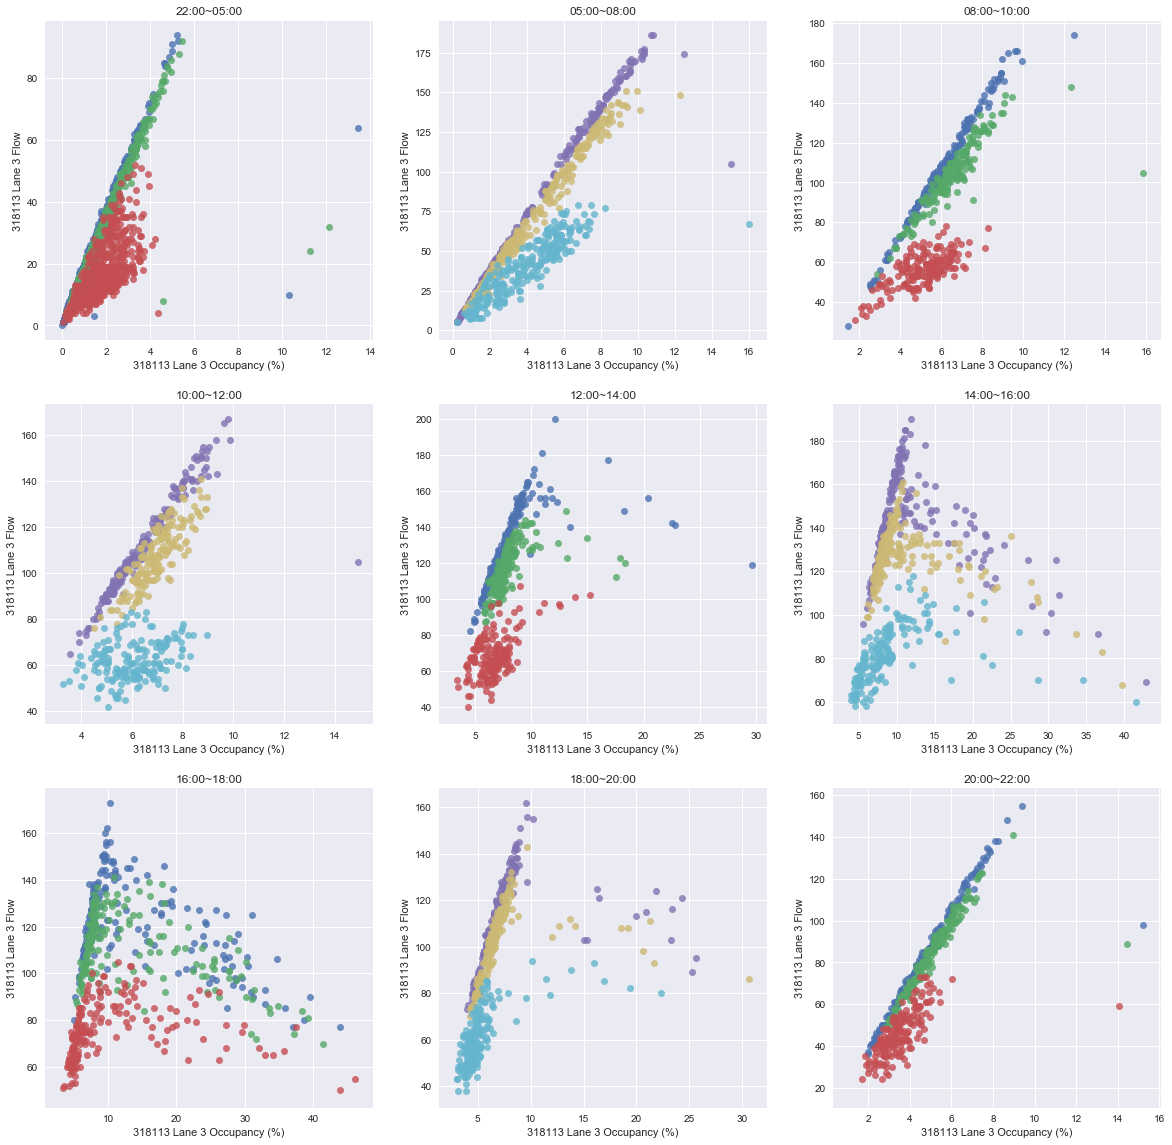

In [123]:
_, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(20,20))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
times = [
    ("22:00", "05:00"),
    ("05:00", "08:00"),
    ("08:00", "10:00"),
    ("10:00", "12:00"),
    ("12:00", "14:00"),
    ("14:00", "16:00"),
    ("16:00", "18:00"),
    ("18:00", "20:00"),
    ("20:00", "22:00")
]

for (ax, time) in zip(axes, times):
    ax.set_title(f"{time[0]}~{time[1]}")
    sns.regplot(y="318113 Lane 1 Flow", x="318113 Lane 1 Occupancy (%)", data=df.between_time(time[0], time[1]), ax=ax, fit_reg=False)
    sns.regplot(y="318113 Lane 2 Flow", x="318113 Lane 2 Occupancy (%)", data=df.between_time(time[0], time[1]), ax=ax, fit_reg=False)
    sns.regplot(y="318113 Lane 3 Flow", x="318113 Lane 3 Occupancy (%)", data=df.between_time(time[0], time[1]), ax=ax, fit_reg=False)




### Traffic patterns on some week of day

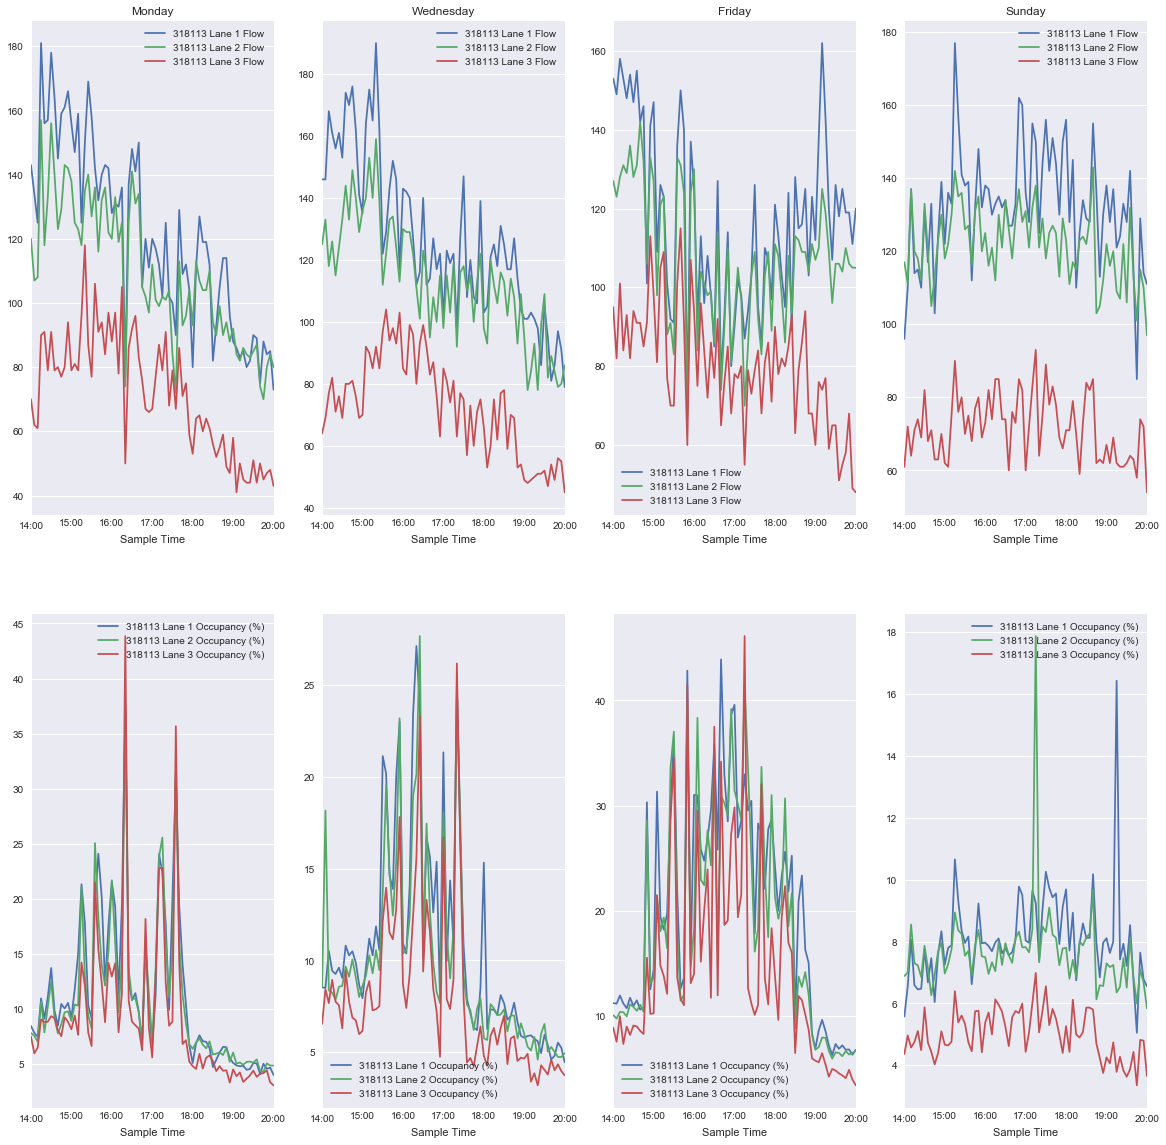

In [161]:
_, ((ax1, ax2, ax3, ax7), (ax4, ax5, ax6, ax8)) = plt.subplots(2,4, figsize=(20,20))
axes = [(ax1, ax4), (ax2, ax5), (ax3, ax6), (ax7, ax8)]
dows= [
    0, 2, 4, 6
]

for ((ax0, ax1), dow) in zip(axes, dows):
    ax0.set_title(f"{calendar.day_name[dow]}")
    df[["318113 Lane 1 Flow", "318113 Lane 2 Flow", "318113 Lane 3 Flow"]].loc[df.index.dayofweek == dow, ].between_time("14:00", "20:00").plot(ax=ax0)
    df[["318113 Lane 1 Occupancy (%)", "318113 Lane 2 Occupancy (%)", "318113 Lane 3 Occupancy (%)"]].loc[df.index.dayofweek == dow].between_time("14:00", "20:00").plot(ax=ax1)
    
